In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
# import xgboost as xgb
# from keras import Model
from sklearn.svm import SVC
import matplotlib.pyplot as plt
# from keras.optimizers import Adam
# from keras.regularizers import l2, l1
from sklearn.linear_model import SGDClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold
# from keras.layers import (
#     Bidirectional,
#     LSTM,
#     Dense,
#     Dropout,
#     BatchNormalization,
#     Input,
#     Activation,
# )

## Data

In [2]:
df_train = pd.read_csv("./clean_train.csv")
df_train.head()

,Tenure,Matric,Degree,Diploma,Female,Sa_citizen,Birthyear,Birthmonth,Target,Year_survey,...,Home_lang_70_79,Home_lang_80_100,Home_lang_nan,Science_30_39,Science_40_49,Science_50_59,Science_60_69,Science_70_79,Science_80_100,Science_nan
0,0.0,1.0,0.0,0.0,1,1,2000,5,0,2022,...,False,False,True,False,False,False,False,False,False,False
1,427.0,1.0,0.0,0.0,1,1,1989,4,1,2023,...,False,False,True,True,False,False,False,False,False,False
2,0.0,1.0,0.0,0.0,0,1,1996,7,1,2022,...,False,False,True,True,False,False,False,False,False,False
3,810.0,0.0,0.0,0.0,0,1,2000,1,0,2022,...,False,False,True,False,False,False,False,False,False,True
4,0.0,0.0,0.0,0.0,1,1,1998,12,0,2023,...,False,False,True,False,False,False,False,False,False,True


<Axes: xlabel='Target'>

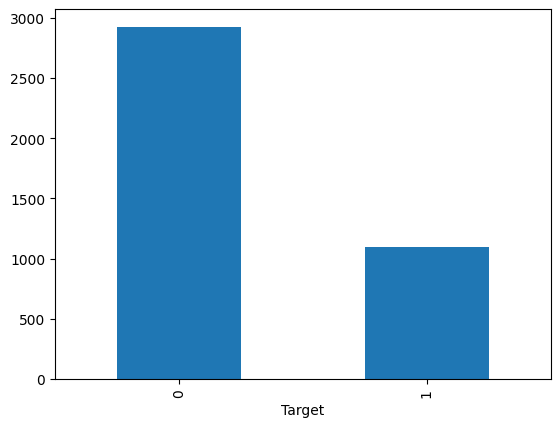

In [3]:
df_train['Target'].value_counts().plot(kind='bar')

## class Imbalance

In [ ]:
# plt.figure(figsize=(15, 5))
# sns.heatmap(df_train.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
# plt.show()

In [ ]:
df_train.columns

In [ ]:
df_train['Province_nan'].unique()

In [ ]:
df_train.shape

In [ ]:
train = df_train.drop('Target', axis=1)
targets = df_train['Target']

train.shape, targets.shape

## Test Data

In [ ]:
# unclean data
test_unclean_df = pd.read_csv("./Test.csv")
test_unclean_df.head()

In [ ]:
# clean data
test_data = pd.read_csv("./clean_test.csv")
test_data.head()

## Models

In [ ]:
predictions = np.array()

#### Naive Bayes Gaussian

In [ ]:
# # NB
# grid_search_params = {"var_smoothing": [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]}

# cls_gnb = GaussianNB()

# grid_search = GridSearchCV(
#     estimator=cls_gnb, param_grid=grid_search_params, cv=10, scoring="accuracy"
# )

# grid_search.fit(train, targets)

# print(f"{grid_search.best_params_}\n\n")
# print(f"{grid_search.best_estimator_}")

In [ ]:
# # perform cross val on data
# gnb = GaussianNB(var_smoothing=1e-07)

# cv = StratifiedKFold(random_state=42, n_splits=10, shuffle=True)

# scores = cross_val_score(gnb, train, targets, cv=cv, scoring='accuracy')

# print(f"mean score: {scores.mean()}")

In [ ]:
# gnb.fit(train, targets)
# predictions = gnb.predict(test_data)
# predictions

#### SVM - SVC

In [ ]:
# # svc takes times
# # "C": [0.08, 0.05, 0.03, 0.01, 0.1, 1, 3, 5, 7, 10],
# grid_search_params = {
#     "C": [0.01, 0.05, 0.1, 1, 5, 10],
#     "kernel": ["linear", "rbf", "poly", "sigmoid"],
#     "degree": [2, 3, 4, 5],
#     "gamma": ["scale", "auto"] + [0.001, 0.01, 0.1, 1],
# }

# cls_svc = SVC()

# grid_search = GridSearchCV(
#     estimator=cls_svc, param_grid=grid_search_params, cv=5, scoring="accuracy"
# )

# grid_search.fit(train, targets)

# print(f"{grid_search.best_params_}\n\n")
# print(f"{grid_search.best_estimator_}")

#### Deep Learning

In [ ]:
# # remove province nan
# dl_data = np.array( train.drop('Province_nan', axis=1)).astype(np.float32)
# dl_data = dl_data.reshape(dl_data.shape[0], 9, -1 )
# dl_data.shape

In [ ]:
# dl_labels = np.array(targets)
# np.unique( dl_labels)

In [ ]:
# input_shape = (9, 8)

# input_layer = Input(shape=input_shape)

# # units = [256, 128, 64, 32]
# x = Bidirectional(LSTM(64, return_sequences=True, kernel_regularizer=(l2(0.01)) ))(input_layer)
# x = LSTM(64, return_sequences=True, kernel_regularizer=(l2(0.01)))(input_layer)
# # x = BatchNormalization()(x)
# x = Activation("relu")(x)
# x = Dropout(0.5)(x)
# #
# x = Bidirectional(LSTM(32, return_sequences=True, kernel_regularizer=(l2(0.01))))(x)
# # x = LSTM(32, return_sequences=True, kernel_regularizer=(l2(0.01)))(x)
# x = BatchNormalization()(x)
# x = Activation("relu")(x)
# x = Dropout(0.5)(x)
# #
# x = Bidirectional(LSTM(16, return_sequences=True, kernel_regularizer=(l2(0.01))))(x)
# # x = LSTM(16, return_sequences=True, kernel_regularizer=(l2(0.01)))(x)
# x = BatchNormalization()(x)
# x = Activation("relu")(x)
# x = Dropout(0.5)(x)

# output_layer = Dense(1, activation="sigmoid")(x)

# model = Model(inputs=input_layer, outputs=output_layer)

# #
# learning_rate = 0.001
# optim_ = Adam(learning_rate=learning_rate)

# #
# model.compile(optimizer=optim_, loss="binary_crossentropy", metrics=["accuracy"])

# model.summary()

In [ ]:
# dl_labels = np.asarray(dl_labels).astype('int').reshape((-1,1))

In [ ]:
# model.fit(dl_data, dl_labels, batch_size=32, epochs=10, validation_split=0.2)

In [ ]:
# # remove province nan
# dl_test_data = np.array( test_data.drop('Province_nan', axis=1)).astype(np.float32)
# dl_test_data = dl_test_data.reshape(dl_test_data.shape[0], 9, -1 )
# dl_test_data.shape

# y_pred = model.predict(dl_test_data)

In [ ]:
# y_pred = np.squeeze(y_pred)
# predictions= ( y_pred >= .5).astype('int')[:,0]
# predictions

#### Multinomial NB

In [ ]:
# # NB
# grid_search_params = {
#     "alpha": [0.1, 0.5, 1.0, 2.0],
#     "fit_prior": [True, False],
# }

# cls_mnb = MultinomialNB()

# grid_search = GridSearchCV(
#     estimator=cls_mnb, param_grid=grid_search_params, cv=30, scoring="accuracy"
# )

# grid_search.fit(train, targets)

# print(f"Best Params: {grid_search.best_params_}")
# print(f"Best Estimator: {grid_search.best_estimator_}")
# print(f"Best Score: {grid_search.best_score_}")

In [ ]:
# cls_mnb.fit(train, targets)

In [ ]:
# predictions = cls_mnb.predict(test_data)
# predictions

#### Random Forest Classifier

In [ ]:
# grid_search_params = {
#     'n_estimators': [50, 100, 200],  # Number of trees in the forest
#     'max_depth': [None, 10, 20, 30],  # Maximum depth of each tree
#     'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
#     'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
#     'max_features': ['auto', 'sqrt', 'log2'],  # Number of features to consider for the best split
# }

# cls_rf = RandomForestClassifier(random_state=42)

# grid_search = GridSearchCV(
#     estimator=cls_rf, param_grid=grid_search_params, cv=10, scoring="accuracy"
# )

# grid_search.fit(train, targets)

# # print(f"{grid_search.best_params_}\n\n")
# print(f"{grid_search.best_estimator_}")

In [ ]:
# rf = RandomForestClassifier(
#     random_state=42, max_depth=30, min_samples_leaf=2, min_samples_split=5
# )

# cv = StratifiedKFold(random_state=42, n_splits=10, shuffle=True)

# scores = cross_val_score(rf, train, targets, cv=cv, scoring='accuracy')

# print(f"mean score: {scores.mean()}")

In [ ]:
# rf.fit(train, targets)
# predictions = rf.predict(test_data)
# predictions

#### KNN

In [ ]:
# grid_search_params = {
#     "n_neighbors": [3, 5, 7, 9],
#     "weights": ["uniform", "distance"],
#     "p": [1, 2],
#     # "algorithm": ["auto", "ball_tree", "kd_tree", "brute"],
# }

# cls_knn = KNeighborsClassifier()

# grid_search = GridSearchCV(
#     estimator=cls_knn, param_grid=grid_search_params, cv=10, scoring="accuracy"
# )

# grid_search.fit(train, targets)

# # print(f"{grid_search.best_params_}\n\n")
# print(f"{grid_search.best_estimator_}")

In [ ]:
# knn = KNeighborsClassifier( n_neighbors=5, weights="distance", p=2 )

# cv = StratifiedKFold(random_state=42, n_splits=10, shuffle=True)

# scores = cross_val_score(knn, train, targets, cv=cv, scoring='accuracy')

# print(f"mean score: {scores.mean()}")

In [ ]:
# knn.fit(train, targets)
# predictions = knn.predict(test_data)
# predictions

#### DecisionTreeClassifier

In [ ]:
# grid_search_params = {
#     "criterion": ["gini", "entropy"],
#     "max_depth": [None, 5, 10, 15, 20],
#     "min_samples_split": [2, 5, 10],
#     "min_samples_leaf": [1, 2, 4],
# }

# cls_dt = DecisionTreeClassifier()

# grid_search = GridSearchCV(
#     estimator=cls_dt, param_grid=grid_search_params, cv=10, scoring="accuracy"
# )

# grid_search.fit(train, targets)

# print(f"{grid_search.best_params_}\n\n")
# print(f"{grid_search.best_estimator_}")

In [ ]:
# dt = DecisionTreeClassifier(
#     criterion="gini", max_depth=10, min_samples_leaf=4, min_samples_split=5
# )
# # dt = DecisionTreeClassifier(max_depth=10, min_samples_leaf=4, min_samples_split=5)

# cv = StratifiedKFold(random_state=42, n_splits=10, shuffle=True)

# scores = cross_val_score(dt, train, targets, cv=cv, scoring="accuracy")

# print(f"mean score: {scores.mean()}")

In [ ]:
# dt.fit(train, targets)
# predictions = dt.predict(test_data)
# predictions

#### SGDClassifier

In [ ]:
# grid_search_params = {
#     "loss": ["hinge", "log", "modified_huber"],
#     "penalty": ["none", "l1", "l2", "elasticnet"],
#     "alpha": [0.0001, 0.001, 0.01, 0.1],
#     "max_iter": [1000, 2000, 3000],
# }

# cls_sdg = SGDClassifier()

# grid_search = GridSearchCV(
#     estimator=cls_sdg, param_grid=grid_search_params, cv=10, scoring="accuracy"
# )

# grid_search.fit(train, targets)

# # # print(f"{grid_search.best_params_}\n\n")
# # print(f"{grid_search.best_estimator_}")

In [ ]:
# sgd = SGDClassifier(alpha=0.001, loss='modified_huber', max_iter=3000,penalty='elasticnet')

# cv = StratifiedKFold(random_state=42, n_splits=10, shuffle=True)

# scores = cross_val_score(sgd, train, targets, cv=cv, scoring='accuracy')

# print(f"mean score: {scores.mean()}")

In [ ]:
# sgd.fit(train, targets)
# predictions = sgd.predict(test_data)
# predictions

#### DecisionTreeRegressor

In [ ]:
# grid_search_params = {
#     "max_depth": [None, 10, 20, 30],
#     "min_samples_split": [2, 5, 10],
#     "min_samples_leaf": [1, 2, 4],
# }

# cls_dt_reg = DecisionTreeRegressor()

# grid_search = GridSearchCV(
#     estimator=cls_dt_reg, param_grid=grid_search_params, cv=10, scoring="accuracy"
# )

# grid_search.fit(train, targets)

# print(f"{grid_search.best_params_}\n\n")
# print(f"{grid_search.best_estimator_}")

In [ ]:
# dt_reg = DecisionTreeRegressor()
# # dt = DecisionTreeClassifier(max_depth=10, min_samples_leaf=4, min_samples_split=5)

# cv = StratifiedKFold(random_state=42, n_splits=10, shuffle=True)

# scores = cross_val_score(dt_reg, train, targets, cv=cv, scoring="accuracy")

# print(f"mean score: {scores.mean()}")

In [ ]:
# dt.fit(train, targets)
# predictions = dt.predict(test_data)
# predictions

#### MLPClassifier

In [ ]:
# grid_search_params = {
#     "hidden_layer_sizes": [(64,), (128,), (256,)],
#     "activation": ["relu", "tanh"],
#     "alpha": [0.0001, 0.001, 0.01],
# }


# cls_mlp = MLPClassifier()

# grid_search = GridSearchCV(
#     estimator=cls_mlp, param_grid=grid_search_params, cv=10, scoring="accuracy"
# )

# grid_search.fit(train, targets)

# print(f"{grid_search.best_params_}\n\n")
# print(f"{grid_search.best_estimator_}")

In [ ]:
# # mlp = MLPClassifier(alpha=0.01, hidden_layer_sizes=(64,))
# mlp = MLPClassifier(activation='relu', alpha=0.0001, hidden_layer_sizes=(256,), random_state=1)
# # mlp = MLPClassifier()

# cv = StratifiedKFold(random_state=42, n_splits=10, shuffle=True)

# scores = cross_val_score(mlp, train, targets, cv=cv, scoring="accuracy")

# print(f"mean score: {scores.mean()}")

In [ ]:
# mlp.fit(train, targets)
# predictions = mlp.predict(test_data)
# predictions

#### XGBosst

## Save to file

In [ ]:
# test_unclean_df["Person_id"].to_csv("./ids.csv", index=False)

In [ ]:
df_submission = pd.DataFrame({"ID": test_unclean_df["Person_id"], "Target": predictions.astype(int)})
df_submission.head()

In [ ]:
df_submission.to_csv("submission.csv", index=False)

In [ ]:
# remove NAN values